###### CODE REFERENCE: RAKKA ALHAZIMI (FSB NLP)

In [8]:
# Standard Library
import string

# Third-party Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

import nltk
from nltk.corpus import stopwords
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Siapkan stopwords

nltk.download("stopwords")
id_stop = set(stopwords.words("indonesian"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Load Dataset

In [3]:
df = pd.read_csv("Violence Report Data - Bahasa Indonesia - Sheet1.csv")

In [4]:
df

,ID,kategori,isi_laporan,sentimen
0,1,Fisik,Ibu saya sering pingsan dipukuli oleh ayah sam...,High
1,2,Psikis,"Sejak kecil, ayah saya tidak menyukai penampil...",High
2,3,Seksual,Pagi tadi saya iseng mengunggah sebuah foto se...,High
3,4,Seksual,ANAK SAYA DIGERAYANGI OLEH LAKI-LAKI TIDAK DIK...,High
4,5,Fisik,Ada kasus pencabulan di SLB dekat rumah. Belum...,High
...,...,...,...,...
495,496,Seksual,"Saya benci dengan kakak ipar saya, dia suka me...",High
496,497,penelantaran,Ayah saya pergi dan tidak pernah kembali karen...,High
497,498,Fisik,"Kenalan saya mengadopsi anak, tapi karena anak...",High
498,499,Seksual,Kemarin saya bertemu lagi dengan teman SMA yan...,High


### EDA

C:\Users\ASUS\.conda\envs\FSB_new\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


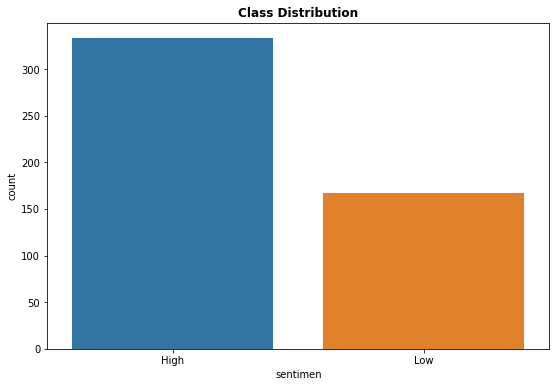

In [5]:
# class distribution

plt.figure(figsize=(9,6))
sns.countplot(df['sentimen'])
plt.title("Class Distribution", weight="bold")
plt.show()

### Text Preprocessing

In [6]:
def text_preprocessing(text):
    text = text.lower()
    table = text.maketrans("", "", string.punctuation)
    text = text.translate(table)
    return text

In [7]:
df["preprocessed_text"] = df["isi_laporan"].map(text_preprocessing)

In [12]:
df

,ID,kategori,isi_laporan,sentimen,preprocessed_text
0,1,Fisik,Ibu saya sering pingsan dipukuli oleh ayah sam...,High,ibu saya sering pingsan dipukuli oleh ayah sam...
1,2,Psikis,"Sejak kecil, ayah saya tidak menyukai penampil...",High,sejak kecil ayah saya tidak menyukai penampila...
2,3,Seksual,Pagi tadi saya iseng mengunggah sebuah foto se...,High,pagi tadi saya iseng mengunggah sebuah foto se...
3,4,Seksual,ANAK SAYA DIGERAYANGI OLEH LAKI-LAKI TIDAK DIK...,High,anak saya digerayangi oleh lakilaki tidak dike...
4,5,Fisik,Ada kasus pencabulan di SLB dekat rumah. Belum...,High,ada kasus pencabulan di slb dekat rumah belum ...
...,...,...,...,...,...
495,496,Seksual,"Saya benci dengan kakak ipar saya, dia suka me...",High,saya benci dengan kakak ipar saya dia suka men...
496,497,penelantaran,Ayah saya pergi dan tidak pernah kembali karen...,High,ayah saya pergi dan tidak pernah kembali karen...
497,498,Fisik,"Kenalan saya mengadopsi anak, tapi karena anak...",High,kenalan saya mengadopsi anak tapi karena anak ...
498,499,Seksual,Kemarin saya bertemu lagi dengan teman SMA yan...,High,kemarin saya bertemu lagi dengan teman sma yan...


In [13]:
text = df["preprocessed_text"].values
vect = CountVectorizer(stop_words=id_stop) # stopwords removal

# Membuat BoW 
vect.fit(text)
bow = vect.transform(text)

# Atau
bow = vect.fit_transform(text)

C:\Users\ASUS\AppData\Roaming\Python\Python37\site-packages\sklearn\feature_extraction\text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  % sorted(inconsistent)


In [14]:
# Jumlah kosakata
len(vect.vocabulary_)

1373

In [15]:
# X = input data, y = output data
X = bow
y = df["sentimen"].values

### Data Modelling & Prediction

In [16]:
logres = LogisticRegression()
logres.fit(X, y)

LogisticRegression()

In [17]:
# Akurasi model
logres.score(X, y)

0.984

In [18]:
from sklearn.pipeline import Pipeline

ml_pipe = Pipeline([("representation", CountVectorizer()), 
                    ("logres", LogisticRegression())
                    ])

In [19]:
ml_pipe.fit(text, y)

Pipeline(steps=[('representation', CountVectorizer()),
                ('logres', LogisticRegression())])

In [20]:
# Kosakata
len(ml_pipe.named_steps["representation"].vocabulary_)

1624

In [21]:
# Akurasi model
ml_pipe.score(text, y)

0.994

In [22]:
# Prediksi sentimen
contoh = ["teman saya suka ngomong kasar"]

ml_pipe.predict(contoh)

array(['Low'], dtype=object)

In [23]:
ml_pipe.predict_proba(contoh)

array([[0.22614279, 0.77385721]])

In [24]:
# save model
import joblib
pipeline_file = open("sentimen_classifier.pkl","wb")
joblib.dump(ml_pipe, pipeline_file)
pipeline_file.close()